# Market Data EDA (Exploratory Data Analysis)

This notebook loads real-time market data saved as Parquet files and performs basic analysis.

In [4]:
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
from datetime import datetime

# Configuration
DATA_DIR = "data/market_data"

# 1. Find the most recent date directory
if not os.path.exists(DATA_DIR):
    print(f"Data directory not found: {DATA_DIR}")
else:
    date_dirs = sorted([d for d in os.listdir(DATA_DIR) if d.isdigit()], reverse=True)
    if not date_dirs:
        print("No date directories found.")
    else:
        target_date = date_dirs[0]
        print(f"Analyzing data for date: {target_date}")
        
        target_dir = os.path.join(DATA_DIR, target_date)
        parquet_files = glob.glob(os.path.join(target_dir, "*.parquet"))
        
        print(f"Found {len(parquet_files)} parquet files.")

Analyzing data for date: 20251201
Found 16 parquet files.


In [5]:
# 2. Load all parquet files into a single DataFrame
dfs = []
for file in parquet_files:
    try:
        # using fastparquet engine as in the recorder
        df_chunk = pd.read_parquet(file, engine='fastparquet')
        dfs.append(df_chunk)
    except Exception as e:
        print(f"Error reading {file}: {e}")

if dfs:
    df = pd.concat(dfs, ignore_index=True)
    # Convert timestamp string to datetime if needed (recorder saves python datetime object already)
    df = df.sort_values('timestamp')
    print("Data loaded successfully.")
    print(f"Total records: {len(df)}")
else:
    print("No data loaded.")

Data loaded successfully.
Total records: 37784


In [6]:
# 3. Data Preview
if 'df' in locals():
    display(df.head())

,symbol,time,price,diff_sign,diff,open,high,low,volume,accum_volume,timestamp
8116,069500,095131,55320,5,-330,56210,56425,55250,146,2261640,2025-12-01 09:51:31.654008
8117,069500,095131,55325,5,-325,56210,56425,55250,5,2261658,2025-12-01 09:51:31.862357
4839,114800,095131,2687,2,17,2645,2695,2630,12,16641947,2025-12-01 09:51:31.863818
8118,069500,095131,55325,5,-325,56210,56425,55250,691,2262349,2025-12-01 09:51:32.075334
4840,114800,095131,2690,2,20,2645,2695,2630,2,16641949,2025-12-01 09:51:32.076035


In [7]:
# 4. Basic Statistics
if 'df' in locals():
    display(df.describe())

,price,diff,open,high,low,volume,accum_volume,timestamp
count,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,3.778400e+04,37784
mean,40238.422877,-60.501535,40689.419331,40858.039382,39880.432194,518.279404,1.386401e+07,2025-12-01 12:18:03.908265216
min,2655.000000,-575.000000,2645.000000,2695.000000,2630.000000,1.000000,2.261640e+06,2025-12-01 09:51:31.654008
25%,2690.000000,-150.000000,2645.000000,2700.000000,2630.000000,1.000000,3.746495e+06,2025-12-01 10:40:17.135748864
50%,55480.000000,0.000000,56210.000000,56425.000000,55075.000000,4.000000,5.534936e+06,2025-12-01 12:00:33.420097536
75%,55635.000000,20.000000,56210.000000,56425.000000,55075.000000,22.000000,2.382561e+07,2025-12-01 14:03:51.776202752
max,55940.000000,290.000000,56210.000000,56425.000000,55250.000000,703081.000000,5.384013e+07,2025-12-01 15:47:43.907364
std,23990.153077,154.732363,24299.940477,24372.555675,23792.805887,7352.818324,1.562851e+07,NaN


In [9]:
kodex_200_df = df[df['symbol'] == '069500']
kodex_inverse_df = df[df['symbol'] == '114800']

In [10]:
kodex_200_df.describe()

,price,diff,open,high,low,volume,accum_volume,timestamp
count,26836.000000,26836.000000,26836.0,26836.0,26836.000000,26836.000000,2.683600e+04,26836
mean,55560.847742,-89.152258,56210.0,56425.0,55077.098301,72.818006,4.580560e+06,2025-12-01 12:16:29.417485312
min,55075.000000,-575.000000,56210.0,56425.0,55075.000000,1.000000,2.261640e+06,2025-12-01 09:51:31.654008
25%,55455.000000,-195.000000,56210.0,56425.0,55075.000000,1.000000,3.273647e+06,2025-12-01 10:41:42.142921984
50%,55550.000000,-100.000000,56210.0,56425.0,55075.000000,3.000000,4.345496e+06,2025-12-01 11:55:49.124035584
75%,55710.000000,60.000000,56210.0,56425.0,55075.000000,20.000000,5.847157e+06,2025-12-01 13:59:29.694621440
max,55940.000000,290.000000,56210.0,56425.0,55250.000000,40798.000000,7.302243e+06,2025-12-01 15:47:36.848020
std,175.627504,175.627504,0.0,0.0,18.728986,427.263821,1.446530e+06,NaN


In [11]:
kodex_200_df.head(20)

,symbol,time,price,diff_sign,diff,open,high,low,volume,accum_volume,timestamp
8116,069500,095131,55320,5,-330,56210,56425,55250,146,2261640,2025-12-01 09:51:31.654008
8117,069500,095131,55325,5,-325,56210,56425,55250,5,2261658,2025-12-01 09:51:31.862357
8118,069500,095131,55325,5,-325,56210,56425,55250,691,2262349,2025-12-01 09:51:32.075334
8119,069500,095132,55335,5,-315,56210,56425,55250,163,2262857,2025-12-01 09:51:32.282948
8120,069500,095132,55340,5,-310,56210,56425,55250,1,2262858,2025-12-01 09:51:32.912315
8121,069500,095133,55340,5,-310,56210,56425,55250,1,2262859,2025-12-01 09:51:33.754398
8122,069500,095134,55340,5,-310,56210,56425,55250,1,2262861,2025-12-01 09:51:34.808435
8123,069500,095134,55335,5,-315,56210,56425,55250,60,2262922,2025-12-01 09:51:35.019305
8124,069500,095135,55340,5,-310,56210,56425,55250,1,2262926,2025-12-01 09:51:35.652194
8125,069500,095135,55340,5,-310,56210,56425,55250,1,2262928,2025-12-01 09:51:35.860843


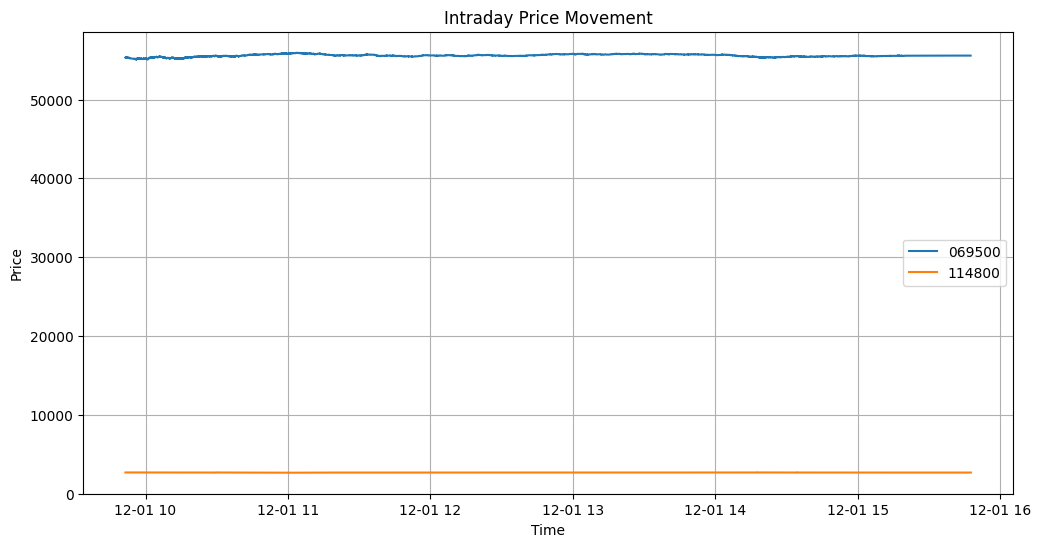

In [8]:
# 5. Visualization: Price Movement by Symbol
if 'df' in locals():
    symbols = df['symbol'].unique()
    
    plt.figure(figsize=(12, 6))
    
    for symbol in symbols:
        symbol_data = df[df['symbol'] == symbol]
        plt.plot(symbol_data['timestamp'], symbol_data['price'], label=symbol)
        
    plt.title("Intraday Price Movement")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()